## <p style="text-align: right;"> &#9989; Shane Adkins</p>

# CMSE 202 Midterm (Section 002 - Fall 2018)

The goal of this final exam is to give you the opportunity to test out some of the skills that you've developed during this course. In particular, you'll practice setting up a GitHub repository, committing and pushing repository changes, importing packages, creating your own class, playing with fourier transforms, and classifying some data. You should find that you have all of the skills necessary to complete this exam!

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam. Once you've read through it, try doing Parts 1 and 2 first so that you have your repository set up and you download the provided data files as they will be necessary to complete the assigned tasks. Let your instructor know right away if you have problems downloading the data!

The exam is set up so that even if you get stuck on one part there are opportunities to get points on the other parts, so consider jumping ahead if you feel like you aren't making progress and then come back later if you have time.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However**: The use of any person-to-person communication software is absolutely not acceptable. If you are seen accessing your email, using a chat program (e.g. Slack), or any sort of collaborative cloud storage or document software (e.g. Google Documents), you will be at risk for receiving a zero on the exam.

**Keep your eyes on your screen!** Unfortunately, there isn't enough space in the room for everyone to sit at their own table so please do your best to keep your eyes on your own screen. This exam is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero.

---
## Part 1: Setting up a repository for tracking changes (20 points)

Before you get too far along in the assignment, you need to set up a **private** GitHub repository that you will store this notebook in and track the changes as you make them. For this section you should:

1. Set up a new **private** Git repository on GitHub.
2. Clone the repository onto your computer.
3. Move this notebook into that repository and then add it and commit it to the repository and push the changes to the remote repository (**Suggestion**: You may want save and close this notebook before you move to the repository and then reopen it after you move it to make sure that you're working with the right copy of the notebook.)
4. Add your instructor as a Collaborator to your respository. As a reminder, your instructor's username on GitHub is: pguthrey

From this point on you will occasionally be asked to save the state of your notebook, commit the changes, and push it to your new repository.

**Note**: If you're struggling with getting the Git repository set up, you can always just work on the notebook as is and try to come back and figure out the repository component later. You may lose some points though since you won't have periodic commits as you make progress along the way, but it will be better than not working on the other parts of the exam!

### ---
## Part 2: Machine Learning (30 points)

For this part of the exam, you will use any regreession or classification method to perform some classification
analysis. First we must obtain the data.  We will load breast cancer data in order to identify whether a tumor is malignant or benign. 

**&#9989; Do This:**  Load in the "load_breast_cancer" dataset from sklearn. 

In [61]:
# Put your code here

%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.cross_validation import train_test_split

data = load_breast_cancer();
type(data)
data1 = pd.DataFrame(data.data, columns = data.feature_names)
data1.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


Now we will select a small subset of the data and analyze it. 

**&#9989; Do This:**  Create a new data array X that is from the 'mean radius' and 'mean smoothness' columns of the dataset. Create a new data array y that corresponds to the data labels. 


In [62]:
# Put your code here

X = np.zeros((data1.shape[0],2))
X[:,0] = data1['mean radius']
X[:,1] = data1['mean smoothness']
Y = data.target

**&#9989; Do This:**  Find a way to intelligently split the data between training and testing data, using 30% of the data as your test size. Then, ensure that the data is scaled appropriately. 

In [63]:
# Put your code here 

train_vectors, test_vectors, train_labels, test_labels = train_test_split(X, Y, test_size=0.3, 
                                                                          random_state=1)

**&#9989; Do This:**  Provide a scatter plot of our data.  Use the color option to color the different labels.

In [64]:
list(data.target_names)

['malignant', 'benign']

Text(0.5,1,'Mean Radius and Mean Smoothness')

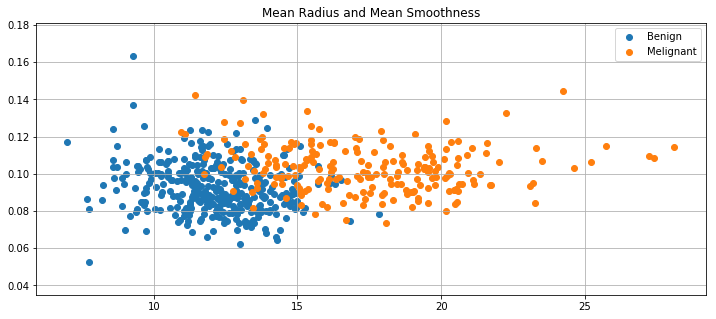

In [65]:
# Put your code here

ones_radius = []
ones_smooth = []
zeros_radius = []
zeros_smooth = []

for i in range(len(Y)):
    if Y[i] == 1:
        ones_radius.append(X[i,0])
        ones_smooth.append(X[i,1])
    else:
        zeros_radius.append(X[i,0])
        zeros_smooth.append(X[i,1])
        
    
plt.figure(figsize=(12,5))
plt.scatter(ones_radius,ones_smooth,label='Benign')
plt.scatter(zeros_radius,zeros_smooth,label='Melignant')
plt.legend()
plt.grid()
plt.title('Mean Radius and Mean Smoothness')

Does it look like we will be able to at least partially separate the data?
Can we completely separate the data?

It doesn't appear we can totally split the data cleanly- but perhaps we can create a classification that is quite accurate

Now we want to see if we can provide a prediction to our testing data using our training data. 

**&#9989; Do This:**  Create predictions for your testing data based on your training data using any method.  Then, create a scatter plot of the testing data.  Don't forget to color the labels.

IMPORTANT: If you use someone else's code, you must cite it with a hyperlink. 

In [66]:
# Put your code here

from sklearn import linear_model

# train SGD classifier with train vectors and vectors
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(train_vectors,train_labels)

# make predictions using trained model
predict = clf.predict(test_vectors)

# keep track of correct and incorrect predictions
correct = []
incorrect = []

# loop through predictions and determine truth value
for i in range(len(predict)):
    if predict[i] == test_labels[i]:
        correct.append(1)
    else:
        incorrect.append(1)

# compute accuracy of model
accuracy = sum(correct)/(sum(correct)+sum(incorrect))*100
print('SDG Classifier trained to',accuracy,'% accuracy')

SDG Classifier trained to 78.3625730994152 % accuracy


Text(0.5,1,'Mean Radius and Mean Smoothness')

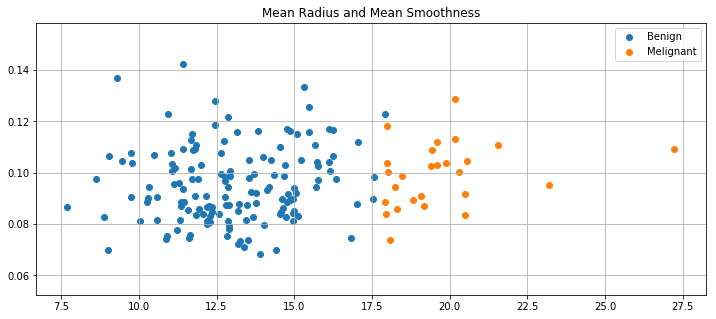

In [68]:
# plot of predictions

ones_radius = []
ones_smooth = []
zeros_radius = []
zeros_smooth = []

for i in range(len(predict)):
    if predict[i] == 1:
        ones_radius.append(test_vectors[i,0])
        ones_smooth.append(test_vectors[i,1])
    else:
        zeros_radius.append(test_vectors[i,0])
        zeros_smooth.append(test_vectors[i,1])
        
    
plt.figure(figsize=(12,5))
plt.scatter(ones_radius,ones_smooth,label='Benign')
plt.scatter(zeros_radius,zeros_smooth,label='Melignant')
plt.legend()
plt.grid()
plt.title('Mean Radius and Mean Smoothness')

Think about this: what is worse - calling a benign tumor malignant or calling a malignant tumor benign? These are two different types of mistakes.

How did your classifier do? Let's compute different types of accuracy of your classifier and find where it makes mistakes. 

* Accuracy is the fraction of tumors that were correctly classified. 
* Precision is the fraction of the tumors that were predicted to be malignant that are actually malignant. 
* Recall is the fraction of malignant tumors that were classified as malignant.


**&#9989; Do This:**  Compute the accuracy, precision, and recall of your classifier. 

In [8]:
# Put your code here

#for i in range(len(test_labels)):
    #if predict[i] == 0:
        
        
    

precision = 1

print('SDG Classifier trained to',accuracy,'% accuracy')


NameError: name 'accuracy' is not defined

**&#9989; Do This:**  Create a scatter plot such that thes point are each one of three colors:

* Color 1 if your classifier marked a benign tumor malignant.
* Color 2 if your classifier marked a malignant tumor benign.
* Color 3 if your classifier correctly classified the tumor.

In [7]:
# Put your code here

---
### STOP: Save the current state of your notebook and files, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 2".
---

---
## Part 3: Fourier Transforms: Build a Class (25 points)

In addition to this notebook you should have also downloaded an image file. It is very difficult to see what this image is supposed to be. We will use what we learned about classes and Fourier transforms to see if we can clean it up.  

**&#9989; Do This:**  Create a class in a separate python script.  It should have the following methods: 

* The initialization funciton should take in a grayscale image and store it and its fourier transform 
* plotfourier:  Plots the fourier transform of the image (don't forget to use the np.fft.fftshift command)
* plotfunction: Plots the the image
* applymask: Takes an externally generated mask and applies it to the fourier function. Further, this method should also use the inverse fourier transform to store the modified new image. 

If you can't get your class working, answer the questions in part 3 as if it was working. 
Don't forget that when you make changes to your python script then you must restart this notebook. 

---
### STOP: Save the current state of your notebook and files, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 3".
---

---
## Part 4: Fourier Transforms: Use the Class (25 points)

Now that we have built a class that we can use to compute and plot fourier transforms, let's use it! 

**&#9989; Do This:**  Read in the image you downloaded.  Use the image to creaste an instance of your class and then plot the image as is. 

Hint: you may want to use the "color.rgb2gray" command.  Also you may have to put the "show" command after you call your class. 

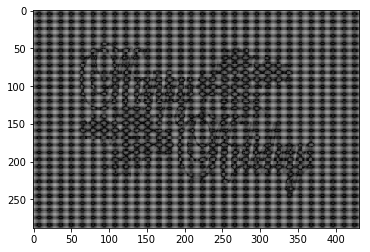

NameError: name 'plt' is not defined

In [2]:
# Put your code here
# For some reason this cell takes 2 tries for the image to actually show up
# ???

import imageio as im
import image_analysis as ia

im = im.imread('mystery_image.jpg')
mystery = ia.Image_Analysis(im)

mystery.plot_function()
plt.imshow()

It's hard to make out what this image is suppoed to be - it seems that there is too much "static" in the form of periodic waves all over the image. However, we know how to manipulate these kinds of signals indirectly.  Use your class to plot the fourier transform of the image here.

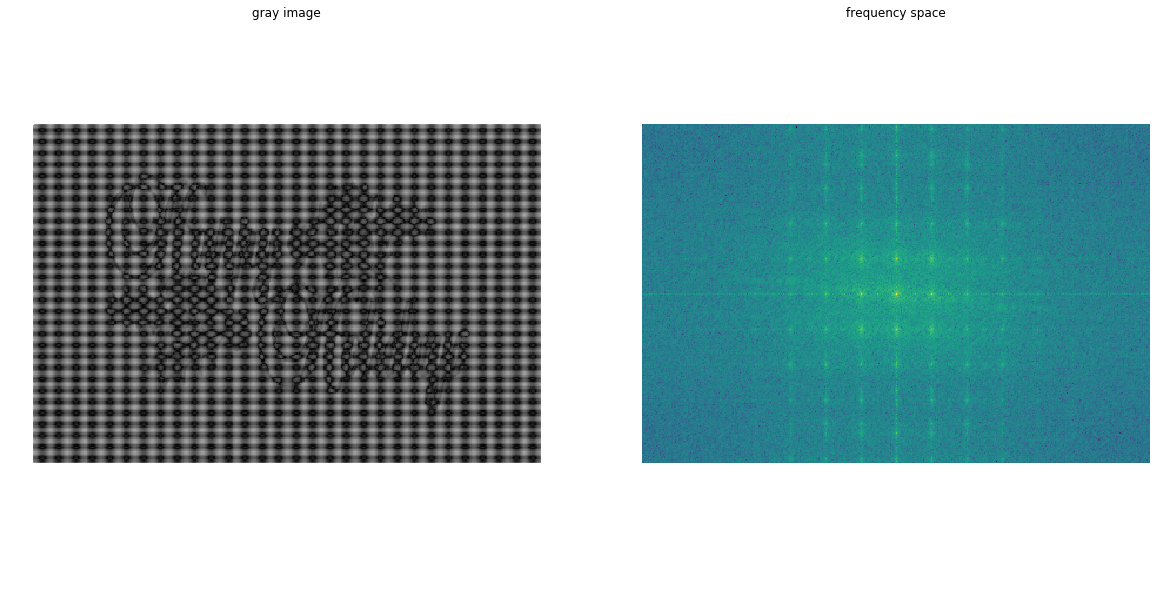

In [3]:
# Put your code here

mystery.plot_fourier()

What do you see?  Describe the fourier transform of our image. 

We see sort of a grid with bright spots intermittenly near the center of the image

Let's see if we can clear out some of the periodic wave patterns in the original image. 

**&#9989; Do This:** Create a mask that will remove the middle row and middle column of the fourier transform image. Use your class to apply the mask. Plot the new fourier transform. 

C:\Users\sadki\MSU\CMSE202\Repositories\Final_Exam\image_analysis.py:64: RuntimeWarning: divide by zero encountered in log10
  ax2.imshow( np.log10(psd2D))


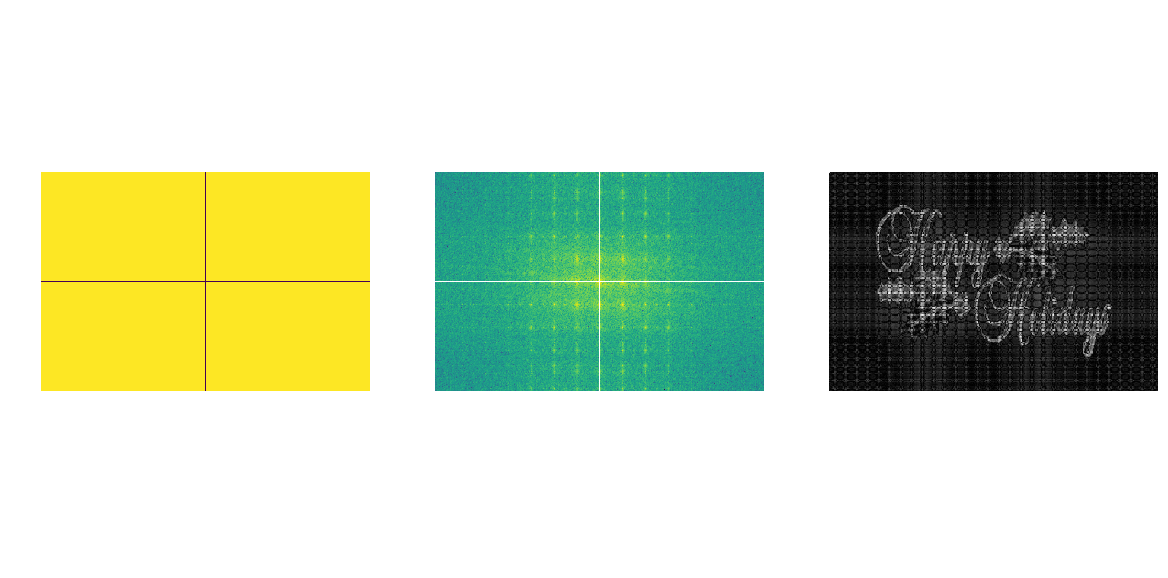

In [4]:
# Put your code here

mystery.mask()

What did your filter do?  What does the new fourier transform look like?

The new fourier transform has the mask applied

Now we will return to the original image and see what it looks like after we modified the frequency structure. 

**&#9989; Do This:** Use your class to plot the new image based on our modifications to the fourier transform.  

C:\Users\sadki\MSU\CMSE202\Repositories\Final_Exam\image_analysis.py:64: RuntimeWarning: divide by zero encountered in log10
  ax2.imshow( np.log10(psd2D))


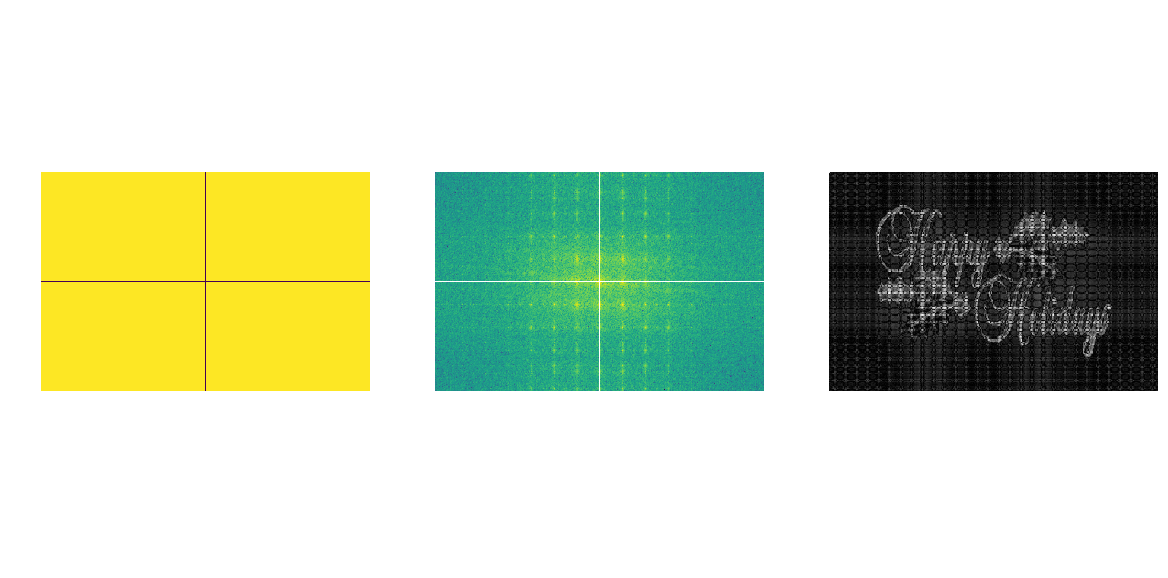

In [5]:
# Put your code here

mystery.mask()

Can you make out the secret message? What does it say?




Happy Holidays!

---
### STOP: Save the current state of your notebook and files, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 4".
---

## You're done! Congrats on finishing your CMSE 202 Final!

Make sure all of your changes to your repository are committed and pushed to GitHub. Also upload a copy of this notebook to the dropbox on D2L in case something went wrong with your repository or if you couldn't get the repository to work.